In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

from sklearn import metrics
from sklearn.cross_validation import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from matplotlib import pyplot as plt
from sklearn.grid_search import GridSearchCV
from matplotlib.colors import ListedColormap

In [10]:
data = pd.read_csv("C:\\Users\Hannah\Desktop\Research Project\data.csv")


In [11]:
P=data.iloc[:,2:32]

In [12]:
scaler = StandardScaler()
P_scaled=scaler.fit_transform(P)
P_scaled=pd.DataFrame(P_scaled)
PP=P_scaled.drop(P_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(PP)
print (P_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())
yd=pd.get_dummies(data.diagnosis)
y=yd.M

(569, 11)
[ 0.42661046  0.15932139  0.10294428  0.07788731  0.06489774  0.05015242
  0.02145044  0.0187846   0.01505759  0.01197751  0.01117206]
0.960255820189


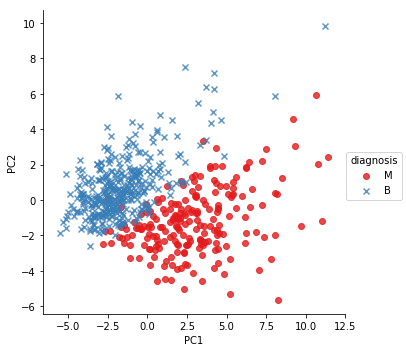

In [13]:
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']
d=data.iloc[:,1:2]  # diagnosis column
#merging the reduced data with diagnosis column
Xy=pd.DataFrame(np.hstack([P_pca,d.as_matrix()]),columns=n)
# plotting the the first 2 pca components against diagnosis
sns.lmplot("PC1", "PC2", hue="diagnosis", data=Xy, fit_reg=False,markers=["o", "x"],palette="Set1")

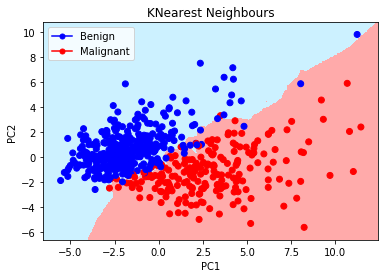

In [24]:
X=(Xy.iloc[:,0:11]).as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn.fit(X_train[:,0:2], y_train)

cmap_light = ListedColormap(['#ccf1ff','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(xy_mesh)

Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax=plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max());plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('KNearest Neighbours')

blue_line = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=5, label='Benign')
red_line = mlines.Line2D([], [], color='red', marker='o',
                          markersize=5, label='Malignant')

plt.legend(handles=[blue_line,red_line])
plt.show()

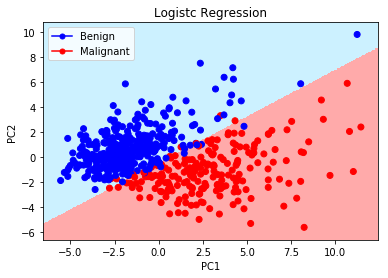

In [27]:
logreg=LogisticRegression(C=1)
logreg.fit(X_train, y_train)
logreg.fit(X_train[:,0:2], y_train)

cmap_light = ListedColormap(['#ccf1ff','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = logreg.predict(xy_mesh)
Z = Z.reshape(xx.shape)

%matplotlib inline
#print(Z)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Logistc Regression')
blue_line = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=5, label='Benign')
red_line = mlines.Line2D([], [], color='red', marker='o',
                          markersize=5, label='Malignant')

plt.legend(handles=[blue_line,red_line])
plt.show()


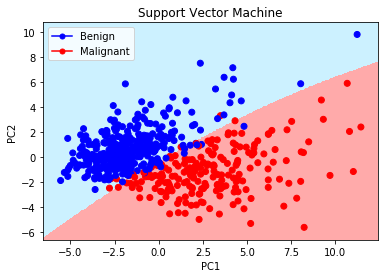

In [28]:
svc=SVC(C=100,gamma=0.001,kernel='rbf')
svc.fit(X_train, y_train)

svc.fit(X_train[:,0:2], y_train)

cmap_light = ListedColormap(['#ccf1ff','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = svc.predict(xy_mesh)
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Support Vector Machine')
blue_line = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=5, label='Benign')
red_line = mlines.Line2D([], [], color='red', marker='o',
                          markersize=5, label='Malignant')

plt.legend(handles=[blue_line,red_line])
plt.show()

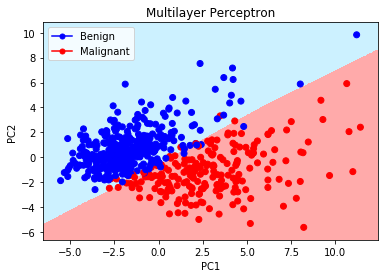

In [29]:
mlp=MLPClassifier(max_iter=250, learning_rate_init=0.1)
mlp.fit(X_train, y_train)

mlp.fit(X_train[:,0:2], y_train)

cmap_light = ListedColormap(['#ccf1ff','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Multilayer Perceptron')
blue_line = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=5, label='Benign')
red_line = mlines.Line2D([], [], color='red', marker='o',
                          markersize=5, label='Malignant')

plt.legend(handles=[blue_line,red_line])
plt.show()

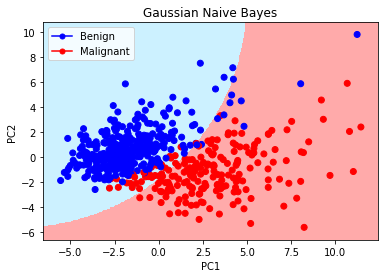

In [30]:
nb=GaussianNB()
nb.fit(X_train, y_train)

nb.fit(X_train[:,0:2], y_train)

cmap_light = ListedColormap(['#ccf1ff','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = nb.predict(xy_mesh)
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Gaussian Naive Bayes')
blue_line = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=5, label='Benign')
red_line = mlines.Line2D([], [], color='red', marker='o',
                          markersize=5, label='Malignant')

plt.legend(handles=[blue_line,red_line])
plt.show()

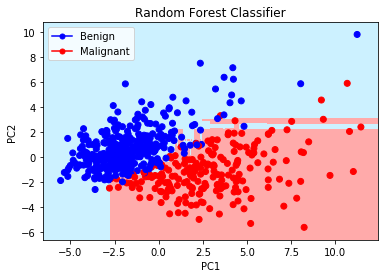

In [37]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc.fit(X_train[:,0:2], y_train)

cmap_light = ListedColormap(['#ccf1ff','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = rfc.predict(xy_mesh)
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Random Forest Classifier')
blue_line = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=5, label='Benign')
red_line = mlines.Line2D([], [], color='red', marker='o',
                          markersize=5, label='Malignant')

plt.legend(handles=[blue_line,red_line])
plt.show()